In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as skm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data set tomado de http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition
# Labeling:
# 1 - Recording of seizure activity
# 2 - They recorded the EEG from the area where the tumor was located 
# 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
# 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
# 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

data = pd.read_csv('data.csv')

x = data.drop(columns = ['Unnamed: 0','y'])
y = data['y']

In [5]:
print(x.shape, y.shape)
x = x.to_numpy()
y = y.to_numpy()

(11500, 178) (11500,)


In [6]:
n_instances = len(y)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
C = np.logspace(-7,3,7)
f1_l1 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l1', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l1.append(f1_score)

In [8]:
f1_l2 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l2', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l2.append(f1_score)

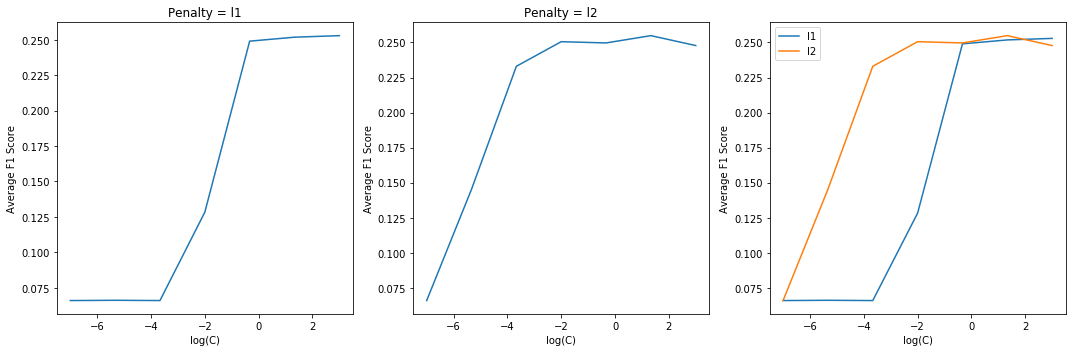

In [9]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.plot(np.log10(C),f1_l1)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l1')
plt.subplot(132)
plt.plot(np.log10(C),f1_l2)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l2')
plt.subplot(133)
plt.plot(np.log10(C),f1_l1, label='l1')
plt.plot(np.log10(C),f1_l2, label='l2')
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.legend()

plt.tight_layout()

Es posible que sea mejor clasificar si el paciente tuvo una seizure o no. Entonces:
1 - Recording of seizure activity
0 - Else

In [10]:
y[y==(2 or 3 or 4 or 5)] = 0

In [11]:
f1_l1 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l1', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l1.append(f1_score)

In [12]:
f1_l2 = []
for element in C:
    lrm = LogisticRegression(C = element, penalty='l2', solver='saga', tol=0.1, multi_class = 'auto')
    lrm.fit(x_train, y_train)
    f1_score = skm.f1_score(y_test,lrm.predict(x_test),average = 'macro')
    f1_l2.append(f1_score)

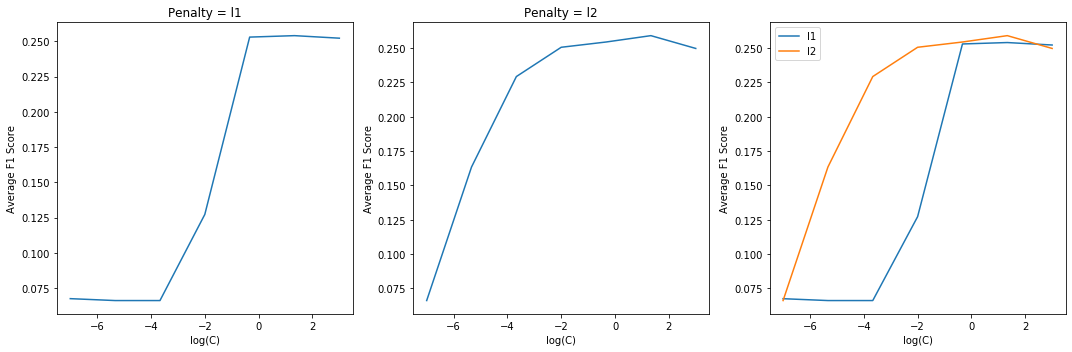

In [13]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.plot(np.log10(C),f1_l1)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l1')
plt.subplot(132)
plt.plot(np.log10(C),f1_l2)
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.title('Penalty = l2')
plt.subplot(133)
plt.plot(np.log10(C),f1_l1, label='l1')
plt.plot(np.log10(C),f1_l2, label='l2')
plt.xlabel('log(C)')
plt.ylabel('Average F1 Score')
plt.legend()

plt.tight_layout()

Primero que todo, es importante mencionar que el f1 score, tanto usando l1 como l2, se puede ver que tiende a 0.250 para valores de C altos. Pero, hay una clara diferencia, donde haciendo uso de l2, se ve que el f1 score empieza a bajar para valores mucho más pequeños que para los valores de l1 en donde f1 score empieza a bajar. Mientras que el f1 score baja a 0.075 en l1 para valores de c = e-4, para l2 baja en valores cercanos a e-7. Esto, según lo que fue discutido en Slack, quiere decir que l2 no es tan bueno enviando los coeficientes beta a 0, i.e. simplificando el modelo.